# Pedro Emilio Gonzalez Cantu 
# A00827338
Questions:
* 1.- Who was the best 2021 salesman ?,
* 2.- Best sale 2021 ?

In [1]:
import pandas as pd 

In [2]:
import numpy as np 

In [3]:
import matplotlib.pyplot as plt

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import seaborn as sns

In [6]:
from scipy.stats import norm

In [7]:
import statistics 

In [8]:
df = pd.read_csv("Datosventas13.csv")
df

,ID,Num Order,Month Purchase,Client,Costumer type,Concept,Service,Quantity,Price,Cost,Total cost,Sale,Income,Fee,Revenue,Salesman
0,220101,1.0,enero,NYC,Logistica,Camisolas,Confección,65,280.0,125.0,8125.0,18200,10075.0,1.0,55.36%,Pedro
1,220102,2.0,enero,NYC,Logistica,Chalecos,Confección,30,230.0,115.0,3450.0,6900,3450.0,1.0,50.00%,Pedro
2,220103,3.0,enero,Transp Urgentes,Logistica,camisolas,Confección,15,280.0,125.0,1875.0,4200,2325.0,1.0,55.36%,Pedro
3,220104,4.0,enero,Transp Urgentes,Logistica,Chalecos,Confección,41,230.0,115.0,4715.0,9430,4715.0,1.0,50.00%,Pedro
4,220105,5.0,enero,NUEVOMEX,Logistica,camisolas,Confección,41,280.0,125.0,5125.0,11480,6355.0,1.0,55.36%,Pedro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,211265,68.0,diciembre,INTERMODAL,Logistica,taza negra,Serigrafía,15,85.0,20.0,300.0,1275,975.0,1.0,76.47%,Marco
908,211266,69.0,diciembre,INTERMODAL,Logistica,gorra sport,Bordado,30,135.0,45.0,1350.0,4050,2700.0,1.0,66.67%,Marco
909,211267,70.0,diciembre,Kayak,Industrial,Polo Advance,Bordado,35,290.0,155.0,5425.0,10150,4725.0,1.0,46.55%,Pedro
910,211268,71.0,diciembre,LAMSER,Industrial,Chaleco b,Confección,17,280.0,110.0,1870.0,4760,2890.0,1.0,60.71%,Marco


In [9]:
df.describe() #general information of the columns

,ID,Num Order,Quantity,Price,Cost,Total cost,Sale,Income,Fee
count,9.120000e+02,902.000000,912.000000,912.000000,910.000000,912.000000,912.000000,912.000000,888.000000
mean,2.433213e+05,35.876940,47.750000,237.934576,125.825152,4434.190411,8541.631579,4107.985027,0.971847
std,2.416883e+05,23.861591,87.877578,237.041361,159.534406,6451.961268,12153.955507,6420.764284,0.238125
min,2.101010e+05,1.000000,1.000000,7.000000,0.000000,0.000000,150.000000,95.000000,0.000000
25%,2.104568e+05,16.250000,12.000000,125.000000,45.000000,900.000000,2230.000000,1123.750000,1.000000
50%,2.108255e+05,33.500000,24.500000,235.000000,120.000000,2155.000000,4200.000000,2160.000000,1.000000
75%,2.111832e+05,52.000000,51.250000,285.000000,168.750000,5460.000000,10830.000000,4791.000000,1.000000
max,2.111114e+06,119.000000,1640.000000,6000.000000,4000.000000,72000.000000,139400.000000,113160.000000,2.000000


In [10]:
x = df.columns.tolist() #variable list sort by alfabetical order 
x.sort()
x

['Client',
 'Concept ',
 'Cost ',
 'Costumer type',
 'Fee',
 'ID ',
 'Income ',
 'Month Purchase',
 'Num Order',
 'Price ',
 'Quantity',
 'Revenue ',
 'Sale ',
 'Salesman ',
 'Service ',
 'Total cost ']

# Description and type of variables in the database

'Client', Nominal qualitative ; name of the client 
 'Concept ', Nominal qualitative ; what the consumer buy 
 'Cost ', Continuous quantitative ; the production costs 
 'Costumer type', Nominal qualitative ; Costumer economic activity 
 'Fee', Ordinal qualitative ; If the coustumer have paid its bill
 'ID ', Ordinal qualitative ; Identification of the order
 'Income ', Continuous quantitative ; Sale - Cost
 'Month Purchase', Ordinal qualitative ; Month the sale was made
 'Num Order', Ordinal qualitative ; Number of order in that month 
 'Price ', Continuous quantitative ; Price given to costumer
 'Quantity', Discrete quantitative;the number of parts purchased 
 'Revenue ', Continuous quantitative ; percentaje of income 
 'Sale ', Continuous quantitative ; brutal sale
 'Salesman ', Nominal qualitative ; who sold it 
 'Service ', Nominal qualitative ; screen printing or embriodery 
 'Total cost ' Continuous quantitative ; Total production costs for all parts produced.

In [18]:
pd.pivot_table(df,
               index = "Costumer type", 
               aggfunc = 'sum', 
               values = "Sale ",  
               margins = True,
               columns = "Month Purchase" 
              )
#The sales made per economic activity each month of the year, this ill help to do a forecast of then each economic activity acquires their
#products and prepare with enough inventory 

#It also shows which ecomomic activity salesman should focus because its the target market, in this case industrial companys with almost 40% are the main clients

Month Purchase,abril,abril,agosto,agosto,diciembre,diciembre,enero,enero,febrero,febrero,...,marzo,mayo,mayo,noviembre,noviembre,octubre,octubre,septiembre,septiembre,All
Costumer type,,,,,,,,,,,,,,,,,,,,,
Constructora,NaN,NaN,9285.0,NaN,74280.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,51755.0,NaN,NaN,NaN,NaN,NaN,135320
Corporativo,165275.0,NaN,19240.0,NaN,117001.0,NaN,30715.0,NaN,161150.0,NaN,...,NaN,101920.0,NaN,140035.0,NaN,16200.0,NaN,4700.0,NaN,855111
Distribuidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32300.0,NaN,NaN,NaN,NaN,NaN,32300
Entretenimiento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10000.0,NaN,5850.0,NaN,NaN,NaN,54850
Escuela,21709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12250.0,NaN,...,NaN,NaN,NaN,36400.0,NaN,25430.0,NaN,23795.0,NaN,119584
Industrial,121484.0,NaN,408234.0,NaN,204580.0,NaN,383560.0,NaN,226210.0,NaN,...,NaN,237936.0,NaN,219291.0,NaN,263756.0,NaN,355839.0,NaN,3150149
Limpieza,NaN,NaN,NaN,NaN,NaN,NaN,1900.0,NaN,NaN,NaN,...,NaN,10750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12650
Logistica,22340.0,30520.0,63050.0,43850.0,77975.0,40270.0,143035.0,39820.0,180840.0,62200.0,...,51180.0,92435.0,11730.0,39340.0,21080.0,103252.0,60160.0,118790.0,57750.0,1615487
Medicina,NaN,NaN,NaN,NaN,NaN,NaN,45150.0,NaN,8150.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53300


In [12]:
pd.pivot_table(df,
               index = ["Costumer type", "Client"], #
               aggfunc = 'sum', 
               values = "Sale ",  
               margins = True,
               columns = "Month Purchase" 
              )
#Besides knowing our target market we can know the individual purchase of each client per month 
# Construtora velazquez represents 1% of the sales in a year.

Month Purchase                     abril   abril     agosto  agosto   \
Costumer type Client                                                   
Constructora  4XT                    NaN      NaN    9285.0      NaN   
              Cons. Velázquez        NaN      NaN       NaN      NaN   
              Nueve Noventa          NaN      NaN       NaN      NaN   
              RT CONSTRUCC           NaN      NaN       NaN      NaN   
              dip Arq.               NaN      NaN       NaN      NaN   
...                                  ...      ...       ...      ...   
Seguridad     Culmen                 NaN      NaN       NaN      NaN   
              IMPERIUM               NaN      NaN       NaN      NaN   
              SEVIPE              3180.0      NaN       NaN      NaN   
              Sevipe                 NaN      NaN       NaN      NaN   
All                             393954.0  30520.0  533375.0  43850.0   

Month Purchase                  diciembre  diciembre      enero   enero   \
Costumer type Client                                                       
Constructora  4XT                     NaN         NaN       NaN      NaN   
              Cons. Velázquez     74280.0         NaN       NaN      NaN   
              Nueve Noventa           NaN         NaN       NaN      NaN   
              RT CONSTRUCC            NaN         NaN       NaN      NaN   
              dip Arq.                NaN         NaN       NaN      NaN   
...                                   ...         ...       ...      ...   
Seguridad     Culmen                  NaN         NaN       NaN      NaN   
              IMPERIUM                NaN         NaN       NaN      NaN   
              SEVIPE                  NaN         NaN   26650.0      NaN   
              Sevipe                  NaN         NaN       NaN      NaN   
All                              553236.0     40270.0  799045.0  39820.0   

Month Purchase                   febrero  febrero   ...   marzo       mayo  \
Costumer type Client                                ...                      
Constructora  4XT                    NaN       NaN  ...      NaN       NaN   
              Cons. Velázquez        NaN       NaN  ...      NaN       NaN   
              Nueve Noventa          NaN       NaN  ...      NaN       NaN   
              RT CONSTRUCC           NaN       NaN  ...      NaN       NaN   
              dip Arq.               NaN       NaN  ...      NaN       NaN   
...                                  ...       ...  ...      ...       ...   
Seguridad     Culmen              8700.0       NaN  ...      NaN       NaN   
              IMPERIUM               NaN       NaN  ...      NaN       NaN   
              SEVIPE              5625.0       NaN  ...      NaN    4000.0   
              Sevipe                 NaN       NaN  ...      NaN       NaN   
All                             703040.0   62200.0  ...  51180.0  588354.0   

Month Purchase                    mayo   noviembre  noviembre    octubre  \
Costumer type Client                                                       
Constructora  4XT                   NaN        NaN         NaN       NaN   
              Cons. Velázquez       NaN        NaN         NaN       NaN   
              Nueve Noventa         NaN    17755.0         NaN       NaN   
              RT CONSTRUCC          NaN    27600.0         NaN       NaN   
              dip Arq.              NaN     6400.0         NaN       NaN   
...                                 ...        ...         ...       ...   
Seguridad     Culmen                NaN        NaN         NaN       NaN   
              IMPERIUM              NaN        NaN         NaN       NaN   
              SEVIPE                NaN        NaN         NaN       NaN   
              Sevipe                NaN        NaN         NaN       NaN   
All                             11730.0   984126.0     21080.0  713678.0   

Month Purchase                  octubre   septiembre  septiembre      

In [23]:
top = df.sort_values(['Sale '], ascending = False, axis = 0)
top5 = top.head(6)
top5

#Answer to question 2 = The biggest sale was Little Caesars. 

,ID,Num Order,Month Purchase,Client,Costumer type,Concept,Service,Quantity,Price,Cost,Total cost,Sale,Income,Fee,Revenue,Salesman
799,211169,67.0,noviembre,Little caesars,Restaurante,gorros,serigrafia,1640,85.0,16.0,26240.0,139400,113160.0,1.0,81.18%,Mkt
638,210920,21.0,septiembre,MARELLI,Industrial,PANTALON,Bordado,600,220.0,120.0,72000.0,132000,60000.0,1.0,45.45%,Marco
438,210575,72.0,mayo,HUNTER DOUglas,Industrial,batas,bordado,500,190.0,96.0,48000.0,95000,47000.0,1.0,49.47%,Marco
693,211026,27.0,octubre,ECC,Industrial,Polodryfit,Bordado,528,165.0,105.5,55704.0,87120,31416.0,1.0,36.06%,Marco
608,210849,51.0,agosto,HUNTER DOUglas,Industrial,Mezclilla,NaN,500,150.0,110.0,55000.0,77500,20000.0,1.0,25.81%,Marco
665,210947,54.0,septiembre,CRISER,Industrial,Advance,Bordado,220,318.0,153.0,33660.0,70100,36300.0,1.0,51.78%,Kelly


In [13]:
df["Income "].describe()
#The average revenue per purchase order is $4000 mxn with a std of +- $6420 mxn.

count       912.000000
mean       4107.985027
std        6420.764284
min          95.000000
25%        1123.750000
50%        2160.000000
75%        4791.000000
max      113160.000000
Name: Income , dtype: float64

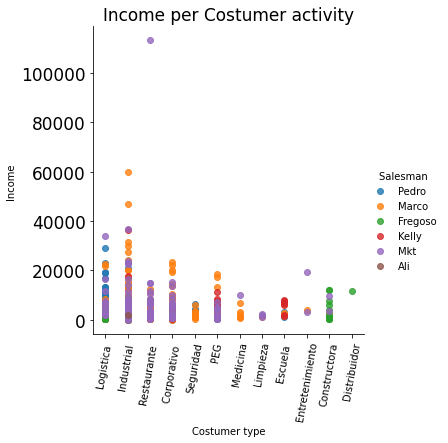

In [20]:
sns.lmplot (x= "Costumer type" ,
            y= "Income ",
            data = df,
            fit_reg= False, #quitar la linea de regresión
            hue = "Salesman " #identificar los puntos
           )
plt.xticks(rotation=80, fontsize=10)
plt.yticks(fontsize=17)
plt.title("Income per Costumer activity", fontsize=17)
plt.show()

#With this type of grafic we can know the sales with best revenue made last year and the responsible of making the sale.
# We can measure the results of each salesman 
#Answer to question 1 = The best salesman was Marketing/Marco

In [15]:
df["Sale "].describe()
#The average ticket per purchase is $8541 mxn, comparing with Sale description we have a porcentual revenue of aprox 50%.

count       912.000000
mean       8541.631579
std       12153.955507
min         150.000000
25%        2230.000000
50%        4200.000000
75%       10830.000000
max      139400.000000
Name: Sale , dtype: float64

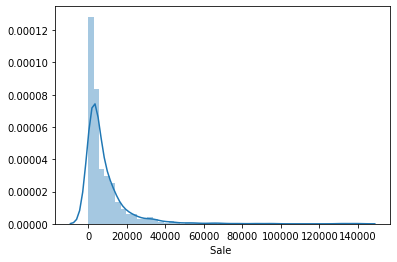

In [16]:
sns.distplot(df["Sale "])
plt.show()

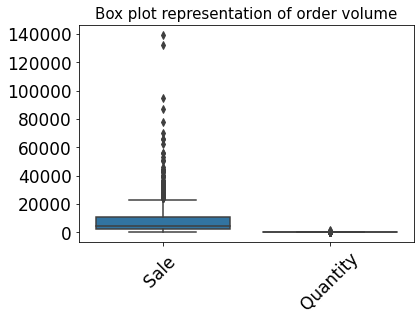

In [21]:
sns.boxplot(data=df.loc[:,["Sale " ,"Quantity" ]]) #grafica de boxplot
plt.xticks(rotation=45, fontsize=17)
plt.yticks(fontsize=17)
plt.title("Box plot representation of order volume", fontsize=15)
plt.show()

#Thanks to the box plot we can see we hace several outliers because some sales were extrordinary difrent form the average. 

The principal struggles were the make all the data and variables adecuate so they can be used in the journal 

The next steps to take is to perfectionate the database and keep adding functions and grafs to have even a richer data analysis.